## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import geopy
import config_file

import matplotlib.pyplot as plt
%matplotlib inline

## Load data and begin cleaning

In [2]:
df = pd.read_csv('crash_rates.csv')

/Users/cassienutter/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,4,5,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

borough   contributing_factor_vehicle_1 contributing_factor_vehicle_2  \
0      BRONX                     Unspecified                   Unspecified   
1   BROOKLYN                     Unspecified                   Unspecified   
2   BROOKLYN                     Unspecified                   Unspecified   
3     QUEENS  Driver Inattention/Distraction                           NaN   
4  MANHATTAN             Alcohol Involvement                   Unspecified   

  contributing_factor_vehicle_3 contributing_factor_vehicle_4  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  contributing_factor_vehicle_5  cross_street_name        timestamp  \
0                           NaN    EAST 156 STREET  1/16/2014 23:30   
1                           NaN     CLASSON AVENUE   8/13/2013 6:50   
2                           NaN  VANDERBILT AVENUE   7/6/2013 21:25   
3                           NaN                NaN    4/6/2019 9:50   
4                           NaN     7 AVENUE SOUTH   2/17/2013 0:20   

    latitude  longitude  ... number_of_persons_killed  \
0  40.814934 -73.897645  ...                      0.0   
1  40.694012 -73.961094  ...                      0.0   
2  40.689469 -73.969105  ...                      0.0   
3  40.592907 -73.795310  ...                      0.0   
4  40.733633 -74.002786  ...                      0.0   

                 off_street_name      on_street_name  unique_key  \
0                            NaN  SOUTHERN BOULEVARD       78403   
1                            NaN       MYRTLE AVENUE      193101   
2                            NaN      DE KALB AVENUE      192934   
3  66-08     BEACH CHANNEL DRIVE                 NaN     4109774   
4                            NaN  CHRISTOPHER STREET       10452   

   vehicle_type_code1  vehicle_type_code2  vehicle_type_code_3  \
0   PASSENGER VEHICLE      LIVERY VEHICLE                  NaN   
1   PASSENGER VEHICLE             PEDICAB                  NaN   
2   PASSENGER VEHICLE             SCOOTER                  NaN   
3               Sedan               Truck                  NaN   
4   PASSENGER VEHICLE      LIVERY VEHICLE                  NaN   

   vehicle_type_code_4  vehicle_type_code_5 zip_code  
0                  NaN                  NaN  10455.0  
1                  NaN                  NaN  11205.0  
2                  NaN                  NaN  11205.0  
3                  NaN                  NaN  11692.0  
4                  NaN                  NaN  10014.0  

[5 rows x 28 columns]

In [4]:
df.contributing_factor_vehicle_1.value_counts()

Unspecified                                              36282
Driver Inattention/Distraction                           17225
Failure to Yield Right-of-Way                            15864
Backing Unsafely                                          3735
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     2108
Passenger Distraction                                     1457
View Obstructed/Limited                                   1260
Traffic Control Disregarded                               1013
Other Vehicular                                            983
Glare                                                      825
Aggressive Driving/Road Rage                               780
Driver Inexperience                                        692
Unsafe Speed                                               659
Pavement Slippery                                          530
Alcohol Involvement                                        519
Turning Improperly                                     

In [5]:
df.borough.value_counts()

BROOKLYN         24652
MANHATTAN        17166
QUEENS           17011
BRONX            11914
STATEN ISLAND     1954
Name: borough, dtype: int64

In [6]:
# remove "unspecified" vehicle type
df = df[df.contributing_factor_vehicle_1 !=  'Unspecified']
# df.contributing_factor_vehicle_1.value_counts()

In [7]:
df.vehicle_type_code1.nunique()

178

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53789 entries, 3 to 90070
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   borough                        42216 non-null  object 
 1   contributing_factor_vehicle_1  51199 non-null  object 
 2   contributing_factor_vehicle_2  2264 non-null   object 
 3   contributing_factor_vehicle_3  645 non-null    object 
 4   contributing_factor_vehicle_4  230 non-null    object 
 5   contributing_factor_vehicle_5  92 non-null     object 
 6   cross_street_name              39604 non-null  object 
 7   timestamp                      53789 non-null  object 
 8   latitude                       50073 non-null  float64
 9   longitude                      50073 non-null  float64
 10  location                       50073 non-null  object 
 11  number_of_cyclist_injured      53789 non-null  int64  
 12  number_of_cyclist_killed       53789 non-null 

In [9]:
df.latitude.isna().sum()

3716

In [10]:
df.dropna(subset= ['latitude', 'longitude'], inplace= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50073 entries, 3 to 90070
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   borough                        41121 non-null  object 
 1   contributing_factor_vehicle_1  47646 non-null  object 
 2   contributing_factor_vehicle_2  2107 non-null   object 
 3   contributing_factor_vehicle_3  604 non-null    object 
 4   contributing_factor_vehicle_4  212 non-null    object 
 5   contributing_factor_vehicle_5  85 non-null     object 
 6   cross_street_name              36603 non-null  object 
 7   timestamp                      50073 non-null  object 
 8   latitude                       50073 non-null  float64
 9   longitude                      50073 non-null  float64
 10  location                       50073 non-null  object 
 11  number_of_cyclist_injured      50073 non-null  int64  
 12  number_of_cyclist_killed       50073 non-null 

In [12]:
df.latitude.value_counts()

0.000000     72
40.754250    27
40.760254    26
40.862680    22
40.807770    21
             ..
40.755283     1
40.540550     1
40.753650     1
40.748608     1
40.623870     1
Name: latitude, Length: 25187, dtype: int64

In [13]:
df.longitude.value_counts()

 0.000000     72
-73.946490    23
-73.909050    23
-73.922510    22
-73.963430    21
              ..
-73.819786     1
-73.968850     1
-73.973495     1
-73.957330     1
-73.855540     1
Name: longitude, Length: 23012, dtype: int64

In [14]:
# replace with NaN 
df.longitude.replace(to_replace= 0.000000, value= np.NaN, inplace= True)
df.latitude.replace(to_replace= 0.000000, value= np.NaN, inplace= True)

In [15]:
df.longitude.value_counts()

-73.909050    23
-73.946490    23
-73.922510    22
-73.945490    21
-73.963430    21
              ..
-73.999679     1
-74.017940     1
-73.770110     1
-73.927112     1
-73.959532     1
Name: longitude, Length: 23011, dtype: int64

In [16]:
df.dropna(subset= ['latitude', 'longitude'], inplace= True)
# df.info()

## Load in data that with columns cleaned by Andrew

In [17]:
geo_df = pd.read_csv('geopy_df.csv')

In [18]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45233 entries, 0 to 45232
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   borough                        37372 non-null  object 
 1   contributing_factor_vehicle_1  45233 non-null  object 
 2   timestamp                      45233 non-null  object 
 3   latitude                       45233 non-null  float64
 4   longitude                      45233 non-null  float64
 5   location                       45233 non-null  object 
 6   number_of_cyclist_injured      45233 non-null  int64  
 7   number_of_cyclist_killed       45233 non-null  int64  
 8   number_of_motorist_injured     45233 non-null  int64  
 9   number_of_motorist_killed      45233 non-null  int64  
 10  number_of_pedestrians_injured  45233 non-null  int64  
 11  number_of_pedestrians_killed   45233 non-null  int64  
 12  number_of_persons_injured      45233 non-null 

## Plot lat / long on map

In [19]:
# check that latitude and longitude are logical numbers
BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))
BBox

(-74.25115, -73.70194, 40.50483, 40.9113269)

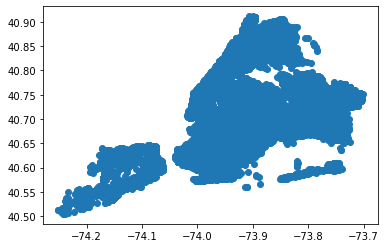

In [20]:
# quick scatterplot to check if there are any outliers
plt.scatter(df.longitude, df.latitude);

In [21]:
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)
import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergeo(
        lon = geo_df['longitude'],
        lat = geo_df['latitude'],
#         text = df['text'],
#         mode = 'markers',
#         marker_color = df['cnt'],
        ))

# fig.update_layout(
#         title = 'Most trafficked US airports<br>(Hover for airport names)',
#         geo_scope='usa',
#     )
fig.show()

### Working Map, but not interactive

In [22]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [23]:
# import street map
street_map = gpd.read_file('data/geo_export_c0d906fc-7533-4cb6-957b-37197a5dd142.shp')

In [24]:
# designate coordinate system
crs = "EPSG:4326"
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(geo_df['longitude'], geo_df['latitude'])]
# create GeoPandas dataframe
map_df = gpd.GeoDataFrame(geo_df,
                          crs= crs,
                          geometry= geometry)

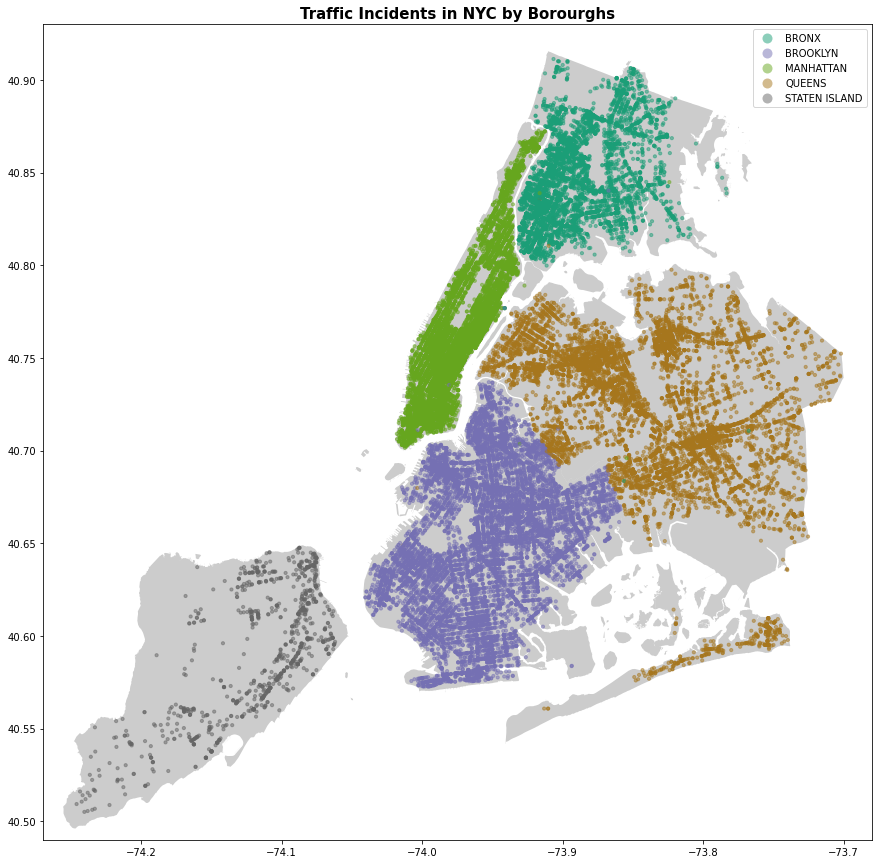

In [25]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))

# add .shp mapfile to axes
street_map.plot(ax= ax, alpha= 0.4,color= 'grey')

# add geodataframe to axes
# assign ‘borough’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
map_df.plot(column= 'borough', ax= ax, alpha= 0.5, legend= True, markersize= 10, cmap= 'Dark2')

# add title to graph
plt.title('Traffic Incidents in NYC by Borourghs', fontsize=15, fontweight= 'bold')

# set latitiude and longitude boundaries for map display
plt.xlim(-74.27,-73.68)
plt.ylim( 40.49, 40.93)

# show map
plt.show()

## Get zipcodes from lat / long

In [26]:
geo_df

borough   contributing_factor_vehicle_1        timestamp   latitude  \
0         QUEENS  Driver Inattention/Distraction    4/6/2019 9:50  40.592907   
1      MANHATTAN             Alcohol Involvement   2/17/2013 0:20  40.733633   
2         QUEENS           Failure to Keep Right  3/14/2016 13:00  40.674000   
3          BRONX     Traffic Control Disregarded    1/1/2014 9:30  40.842464   
4      MANHATTAN                 Other Vehicular  3/12/2015 10:00  40.771783   
...          ...                             ...              ...        ...   
45228      BRONX  Driver Inattention/Distraction   6/6/2016 14:30  40.880140   
45229      BRONX    Aggressive Driving/Road Rage   7/13/2018 0:30  40.881744   
45230      BRONX  Driver Inattention/Distraction  8/31/2019 20:15  40.863106   
45231      BRONX  Driver Inattention/Distraction   4/5/2021 12:40  40.876470   
45232      BRONX  Driver Inattention/Distraction  5/21/2019 16:41  40.873184   

       longitude                   location  number_of_cyclist_injured  \
0     -73.795310     (40.592907, -73.79531)                          0   
1     -74.002786  (40.7336333, -74.0027856)                          0   
2     -73.872100         (40.674, -73.8721)                          0   
3     -73.924135  (40.8424645, -73.9241348)                          0   
4     -73.965435  (40.7717829, -73.9654346)                          0   
...          ...                        ...                        ...   
45228 -73.852036     (40.88014, -73.852036)                          0   
45229 -73.857060     (40.881744, -73.85706)                          0   
45230 -73.861660     (40.863106, -73.86166)                          0   
45231 -73.837040      (40.87647, -73.83704)                          0   
45232 -73.853320     (40.873184, -73.85332)                          0   

       number_of_cyclist_killed  number_of_motorist_injured  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           1   
4                             0                           0   
...                         ...                         ...   
45228                         0                           1   
45229                         0                           0   
45230                         0                           0   
45231                         0                           0   
45232                         0                           0   

       number_of_motorist_killed  number_of_pedestrians_injured  \
0                              0                              1   
1                              0                              2   
2                              0                              1   
3                              0                              2   
4                              0                              1   
...                          ...                            ...   
45228                          0                              1   
45229                          0                              1   
45230                          0                              1   
45231                          0                              1   
45232                          0                              1   

       number_of_pedestrians_killed  number_of_persons_injured  \
0                                 0                          1   
1                                 0                          2   
2                                 0                          1   
3                                 0                          3   
4                                 0                          1   
...                             ...                        ...   
45228                             0                          2   
45229                             0                          1   
452

In [27]:
# create DataFrame of only missing zip codes
zip_miss_df = geo_df[geo_df['zip_code'].isna()]

In [28]:
# find only one zip code from coordinates
# does not have a post code
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent= config_file.user_agent)
coordinates = '40.720753, -74.010080'
location = locator.reverse(coordinates)
location.raw

{'place_id': 299707714,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 893536705,
 'lat': '40.720617149999995',
 'lon': '-74.01035938191617',
 'display_name': 'Citi Public Plaza, Tribeca, Manhattan Community Board 1, Manhattan, New York County, New York, United States',
 'address': {'road': 'Citi Public Plaza',
  'neighbourhood': 'Tribeca',
  'suburb': 'Manhattan',
  'county': 'New York County',
  'city': 'New York',
  'state': 'New York',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['40.7204459', '40.7207987', '-74.0105885', '-74.0100846']}

In [29]:
# get zip codes and add them to list
from geopy.point import Point
geolocator = geopy.Nominatim(user_agent= config_file.user_agent)

# use try and except to get through / around key errors 
# when lat/long does not have a zip code
zips = []
def get_zipcode(df, geolocator, lat_field, lon_field):
    try:
        location = geolocator.reverse(Point((df[lat_field], df[lon_field])))
        zips.append(location.raw['address']['postcode'])
    except KeyError:
        zips.append(np.nan)
        
'''This area commented out to avoid running it'''    
# get_zips = zip_miss_df.apply(get_zipcode, 
#                           axis= 1, 
#                           geolocator= geolocator, 
#                           lat_field= 'latitude', 
#                           lon_field= 'longitude')


'This area commented out to avoid running it'

In [30]:
# check that length of list matches length of df
print(len(zips))

# see what data looks like
zips

0


[]

In [31]:
# replace missing values with ones from list
geo_df.loc[geo_df.zip_code.isnull(), 'zip_code'] = zips

ValueError: Must have equal len keys and value when setting with an iterable

## Get road names
Repeat same process from zip codes to get "on street"

In [ ]:
# use geopy to get street names
locator = Nominatim(user_agent= config_file.user_agent)

coordinates = '40.720753, -74.010080'
location = locator.reverse(coordinates)
location.raw['address']['road']

In [ ]:
# create DataFrame of only missing zip codes
road_miss_df = geo_df[geo_df['on_street_name'].isna()]

In [ ]:
# get roads and add them to list
geolocator = geopy.Nominatim(user_agent= config_file.user_agent)

# use try and except to get through / around key errors
roads = []
def get_road(df, geolocator, lat_field, lon_field):
    try:
        location = geolocator.reverse(Point((df[lat_field], df[lon_field])))
        roads.append(location.raw['address']['road'])
    except KeyError:
        roads.append(np.nan)
        
'''This section commented out to prevent it from running'''    
# get_roads = road_miss_df.apply(get_road, 
#                           axis= 1, 
#                           geolocator= geolocator, 
#                           lat_field= 'latitude', 
#                           lon_field= 'longitude')

In [ ]:
# check length of list matches df and see what is in the list
print(len(roads))

roads

In [ ]:
# this list contains some float classes
ls = [type(item) for item in roads]
print(ls)

In [ ]:
# floats are most likely missing values
# where geopy could not find a street name
# see how many missing street names there are
sum(isinstance(i, float) for i in roads)

In [ ]:
#convert all data types to string
# make all letters uppercase to match existing data

cap_roads = []
roads = [str(i) for i in roads]
for i in roads:
    rd_name = i.upper()
    cap_roads.append(rd_name)

In [ ]:
cap_roads

In [ ]:
# replace missing values with ones from list
geo_df.loc[geo_df.on_street_name.isnull(), 'on_street_name'] = cap_roads

In [ ]:
geo_df.info()

In [ ]:
# find street names that are were turned to "NAN" when it was capitalized
geo_df[geo_df['on_street_name'] == 'NAN']

In [ ]:
# save this data
geo_df.to_csv('data/less_nas.csv', index= False)

## Get Missing Boroughs

In [ ]:
new_df = pd.read_csv('data/less_nas.csv')

In [ ]:
# drop those data points that have missing street names
new_df = new_df[new_df['on_street_name'] != 'NAN']

In [ ]:
# drop missing zip code values
print(new_df.zip_code.isna().sum())
new_df.dropna(subset= ['zip_code'], inplace= True)

In [ ]:
new_df.info()

In [ ]:
# keep only first 5 numbers in zip code and make data type = int
new_df['zipcode'] = new_df['zip_code'].str[:5]
new_df['zipcode'] = new_df['zipcode'].astype(int)

In [ ]:
# drop old zip_code column
new_df.drop(labels= 'zip_code', axis= 1, inplace= True)

In [ ]:
new_df.head()

In [ ]:
# get zip code and borough data
pd.read_html('https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php')

Copy / pasting data into spreadsheet was easier to clean / manipulate.
- Copied to Google Sheets, placed all zip codes in one column, all Boroughs in another
- Find & Replace used to replace "Staten" with "Staten Island" to match existing data in Dataframe
- Sorted by zip codes in ascending order
- Found some zip codes were duplicated - "Remove Duplicates" used
- Added zip codes like "10065" and "10075" - found they were not on there after running code and still had missing values (took missing values from 531 to 63)
- Used Google to find boroughs of zip codes that were missing from NYC_zip_and_boroughs .csv
- Saved as .csv file to to join with existing DataFrame

In [ ]:
# data came from website above (nycbynatives.com)
nyc_zips = pd.read_csv('data/NYC_Zipcodes_and_Boroughs.csv', names= ['zip', 'bor'])
# nyc_zips

In [ ]:
# join zip_borough csv with Dataframe
new_df = new_df.join(nyc_zips.set_index('zip'), on= 'zipcode', how= 'left')

In [ ]:
new_df.head()

In [ ]:
# set borough column to values from bor column and drop "bor" column
new_df['borough'] = new_df['bor']
new_df.drop(labels= 'bor', axis= 1, inplace= True)

In [ ]:
new_df.head()

In [ ]:
new_df.borough.isna().sum()

In [ ]:
missing_borough = new_df[new_df['borough'].isna()]

In [ ]:
# new_df[new_df.isnull().any(axis= 1)]
missing_borough.zipcode.value_counts()

The value "100" is not a zip code, and "12692" is Poughkeepsie, New York which is not located in any of the 5 boroughs. The values will be dropped.

In [ ]:
new_df = new_df[(new_df.zipcode != 100) & (new_df.zipcode != 12692)]

In [ ]:
new_df.borough.isna().sum()

In [ ]:
new_df.to_csv('data/cleaned.csv', index= False)

In [ ]:
# don't go past here
break

## EXTRAS! Note section 
Things that didn't work out but led to where we are today

In [ ]:
# used in trying to plot lat/ long points

# import plotly_express as px
# import geopandas as gpd

# fig = px.scatter_mapbox(df, lat= 'latitude', lon= 'longitude')
# fig.show()

# fig = px.scatter_mapbox(df,
#                         lat= df.latitude.x,
#                         lon= df.longitude.y,
#                         hover_name="name",
#                         zoom=1)
# fig.show()

# import pandas as pd
# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame

# from shapely.geometry import Point

In [ ]:
# tried to use rate limiter in case of hitting limit w/ geopy
# locator = Nominatim(user_agent= config_file.user_agent, timeout= 5)
# rgeocode = RateLimiter(locator.reverse, min_delay_seconds= 0.1)